In [1]:
%matplotlib widget

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

import timeSeriesInsightToolkit as tsi


# Load positions

In [4]:
basePath = "C:/Users/g_gos/records/proc/bfanini-20231026-kjtgo0m0w/"  #"path/to/group/folder/"
pathSes  = basePath + "preprocessed-VR-sessions-gated/" 
ids, fileNames, dfSs, df = tsi.readData(pathSes)
ids, fileNames, [paths,dpaths,fpaths] = tsi.getVarsFromSession(pathSes,['pos','dir','f'])
#print(fpaths[0].shape, paths[1].shape)
bbox = tsi.makeBBox(paths,dpaths,fpaths)


In [21]:
bbox

{'x0': -6.505999999999999,
 'x1': 5.856,
 'y0': -0.04500000000000004,
 'y1': 5.01,
 'z0': -6.006,
 'z1': 5.936}

C:\Users\g_gos\Code\TimeSeriesInsightToolkit\timeSeriesInsightToolkit.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


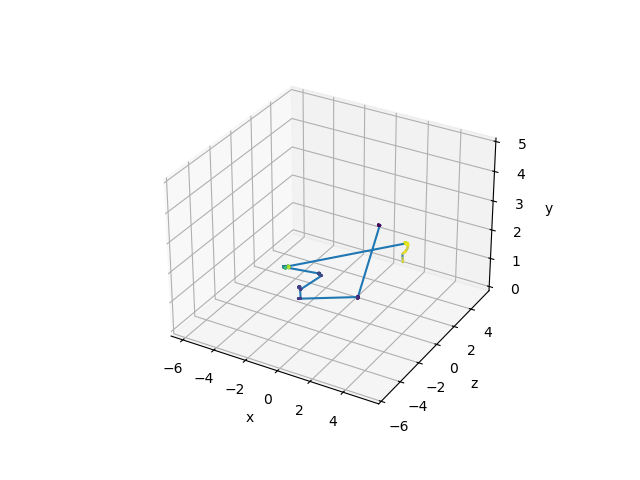

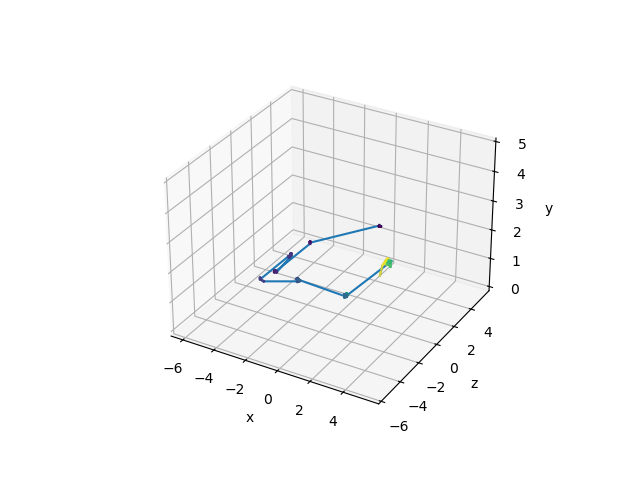

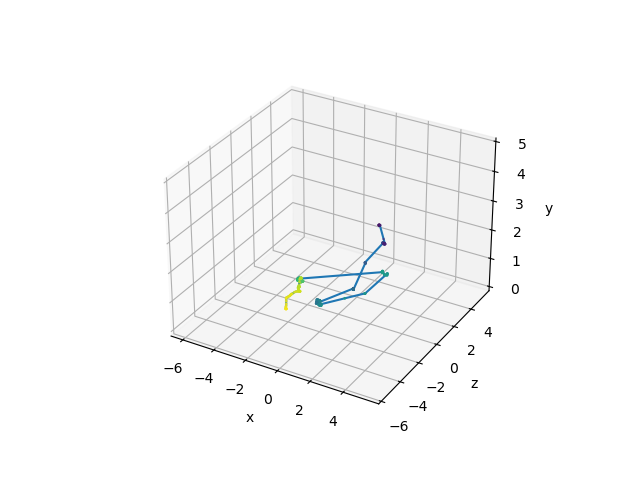

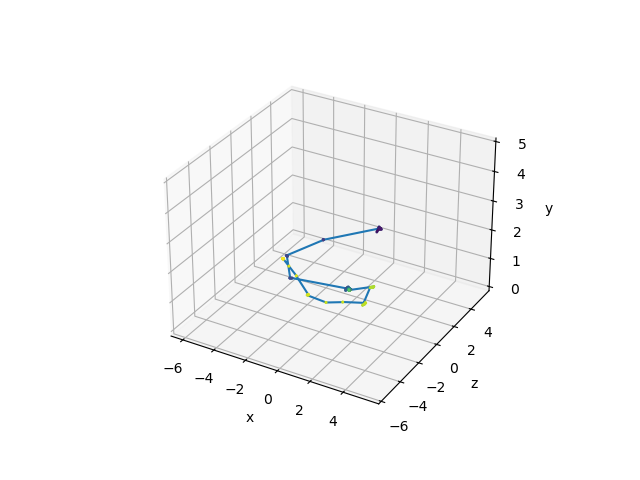

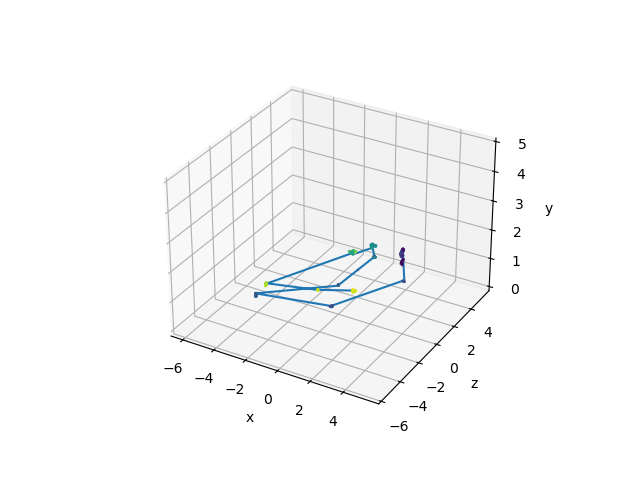

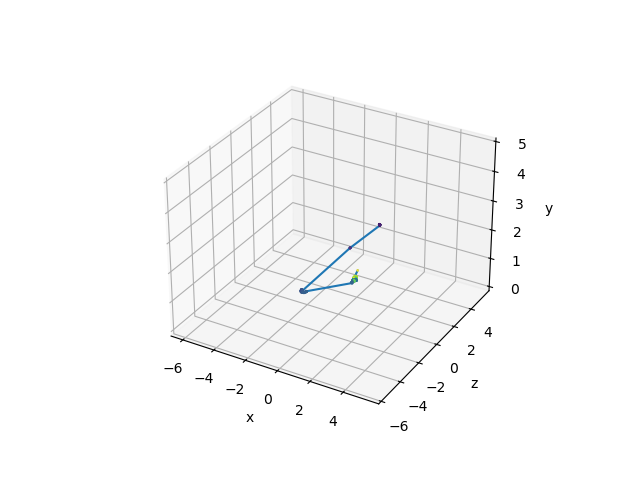

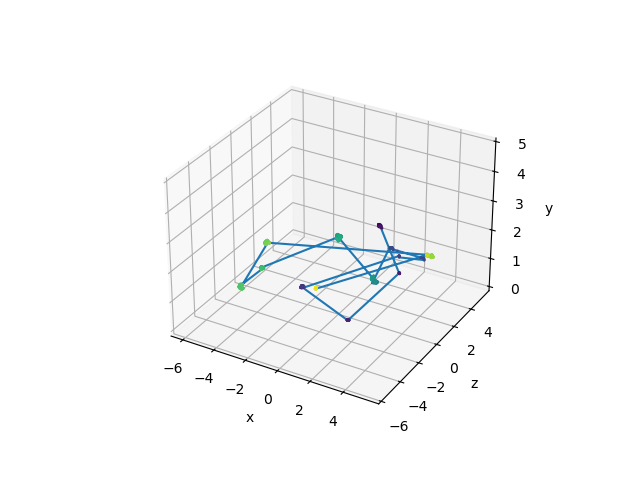

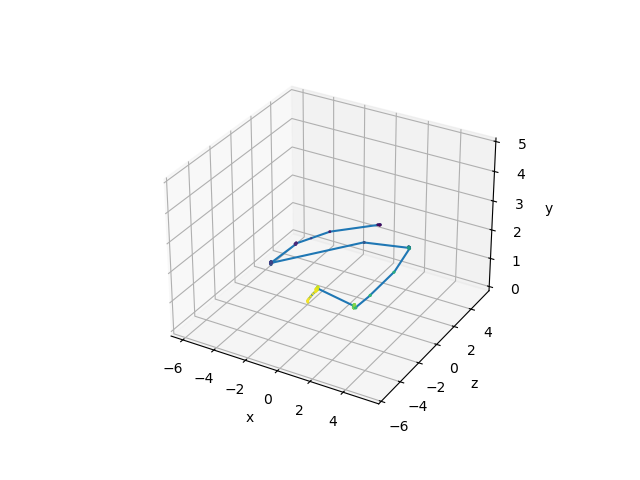

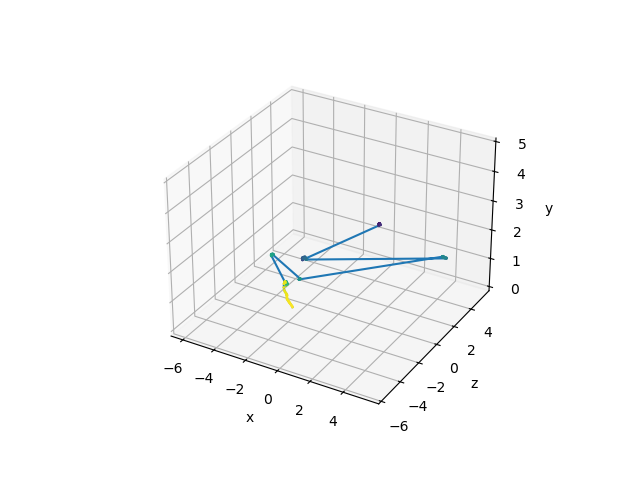

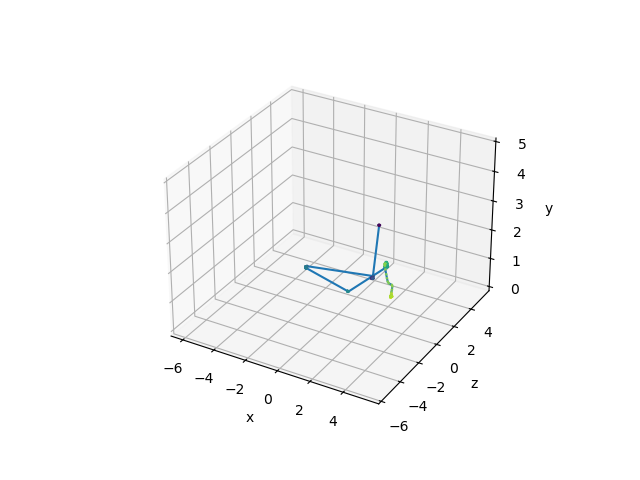

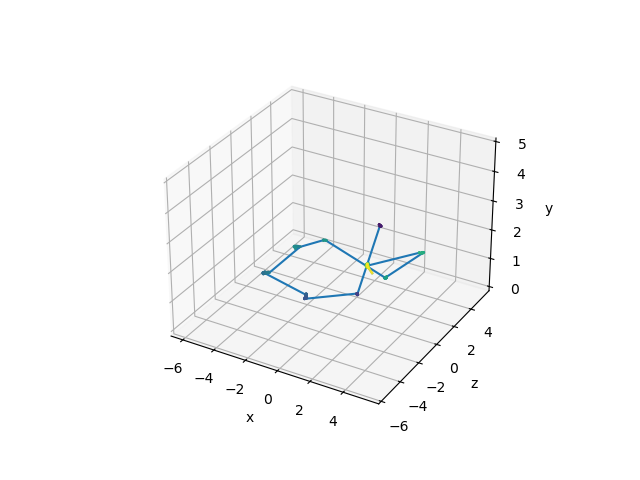

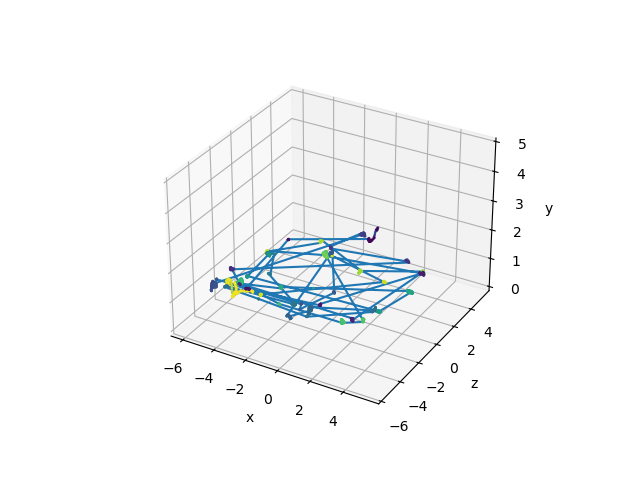

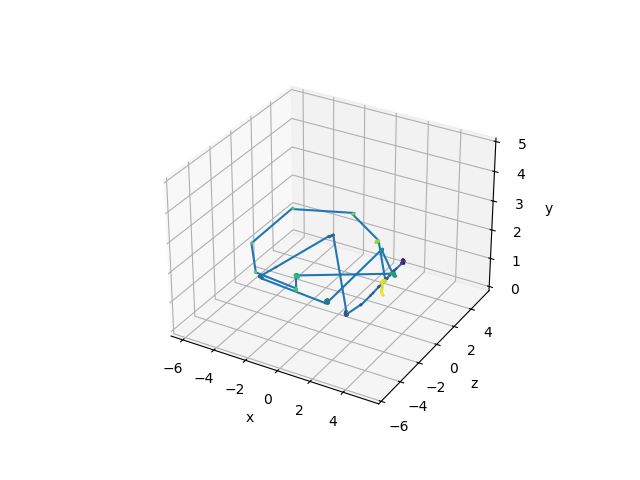

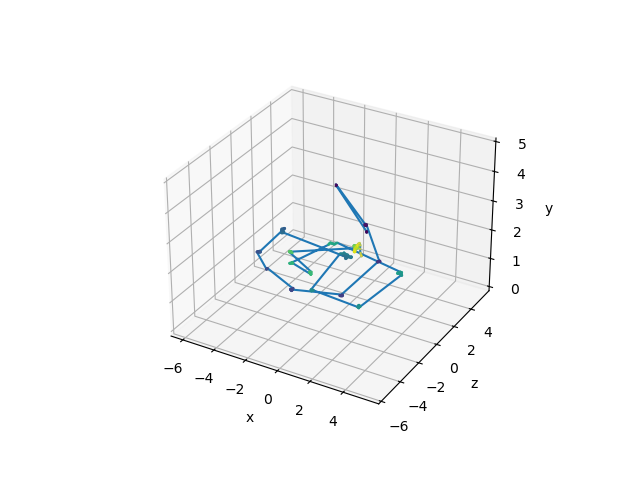

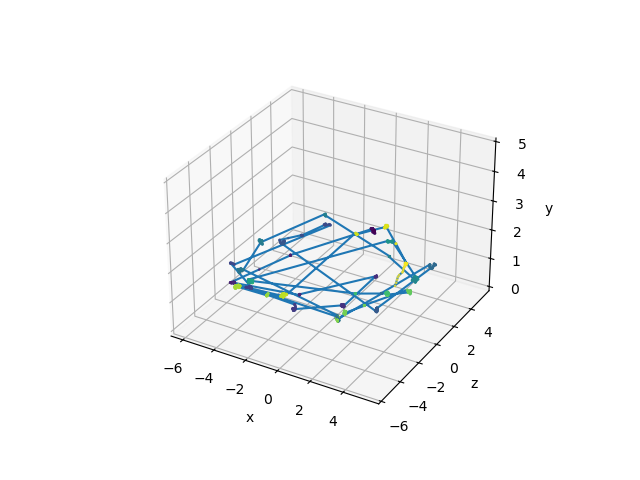

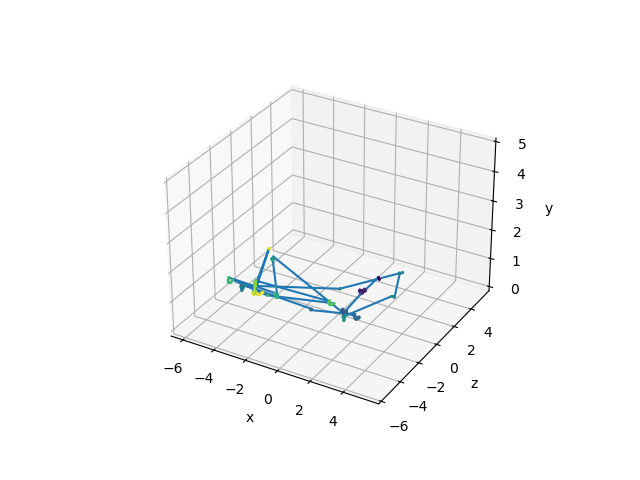

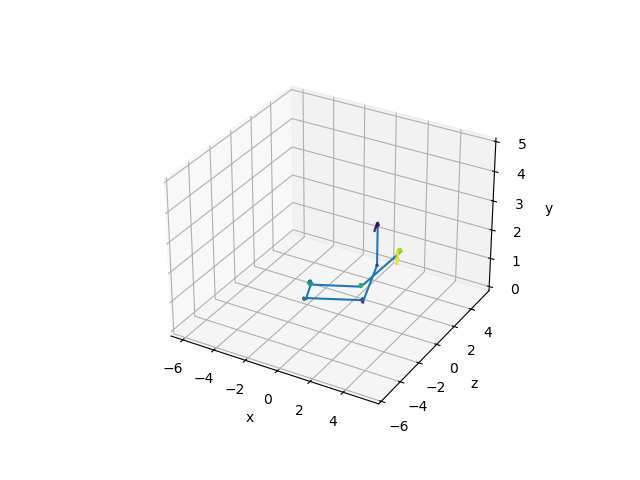

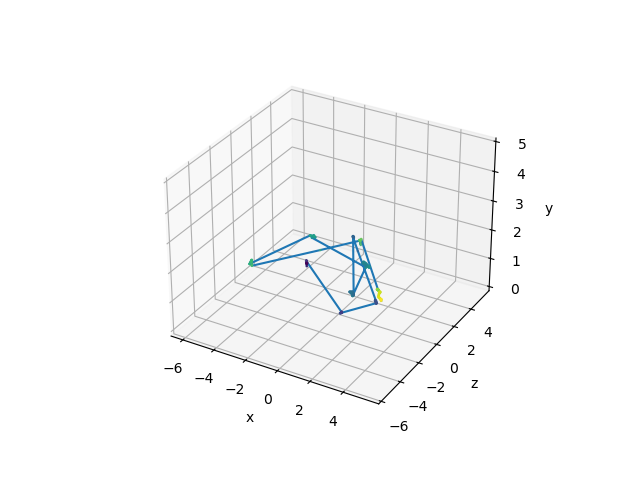

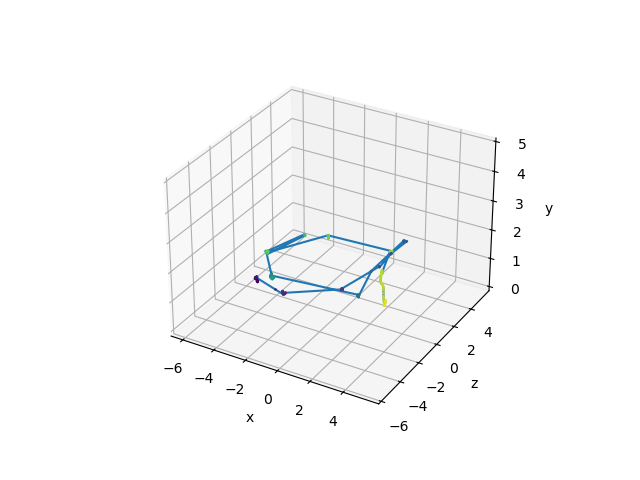

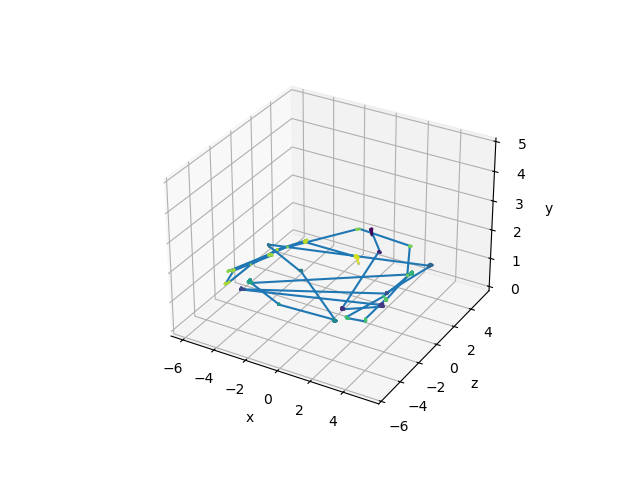

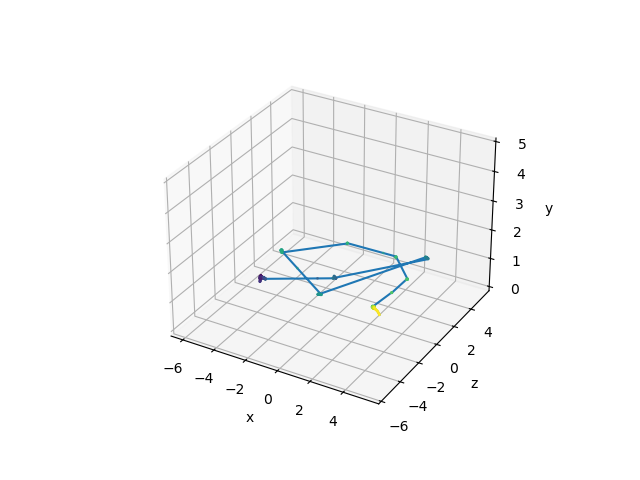

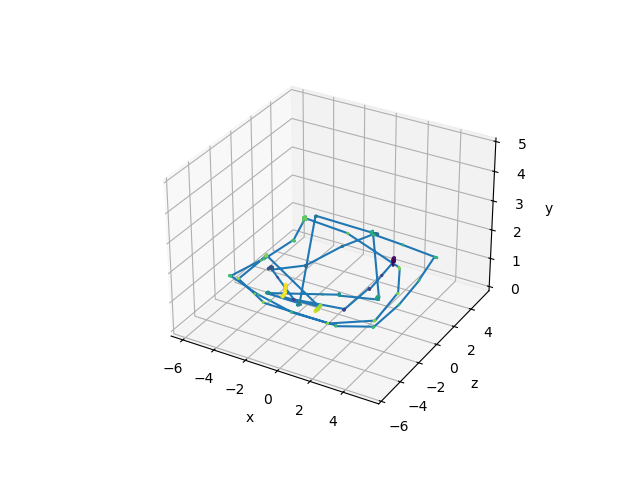

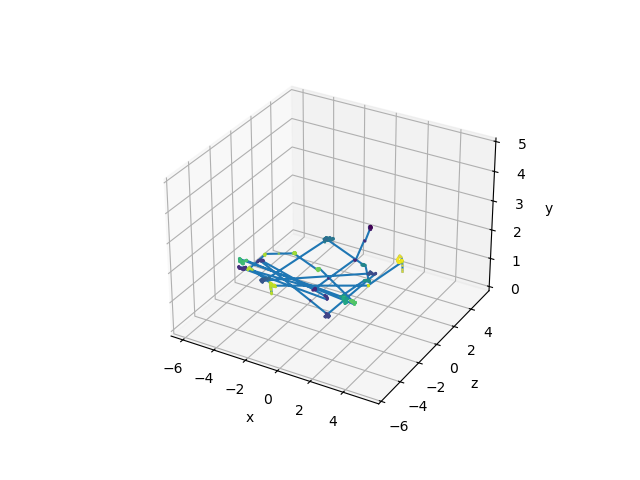

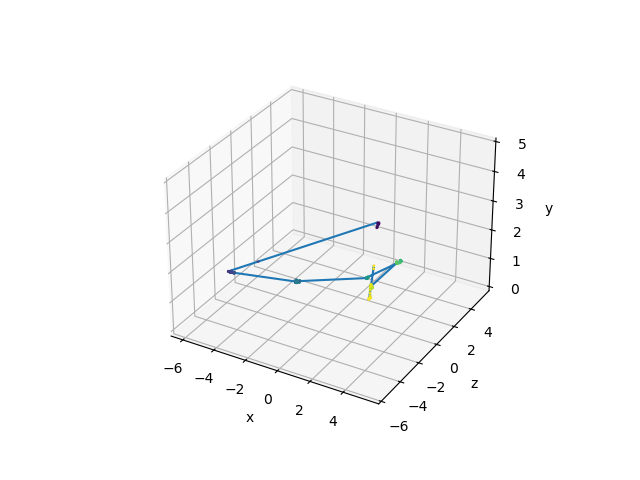

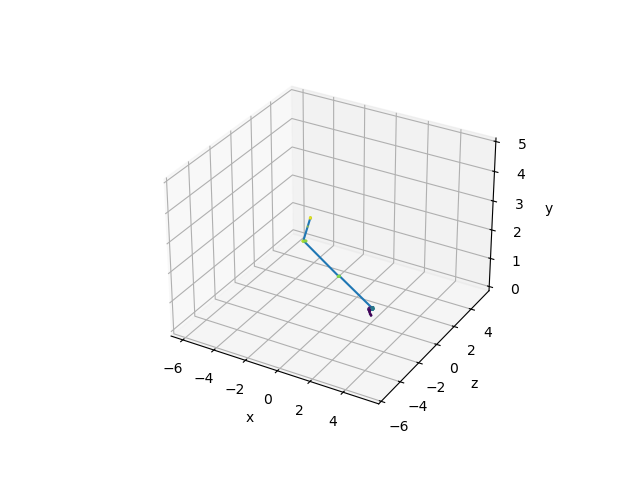

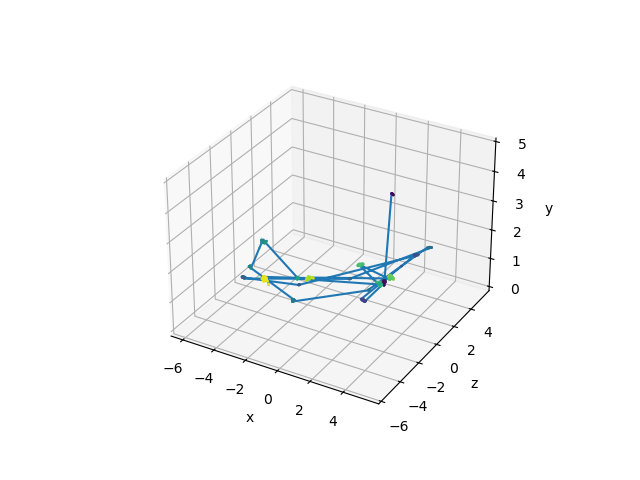

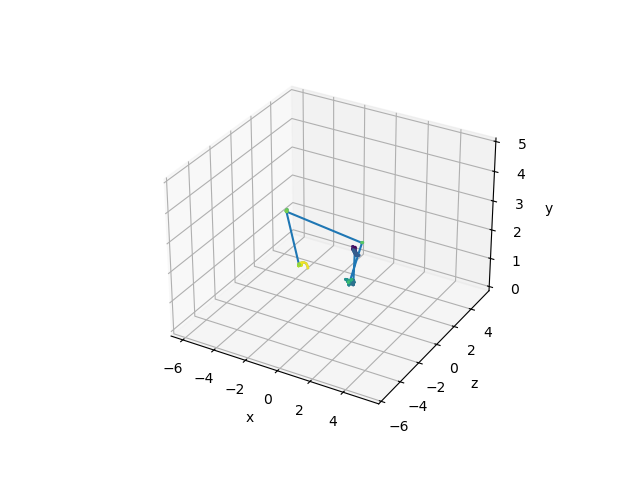

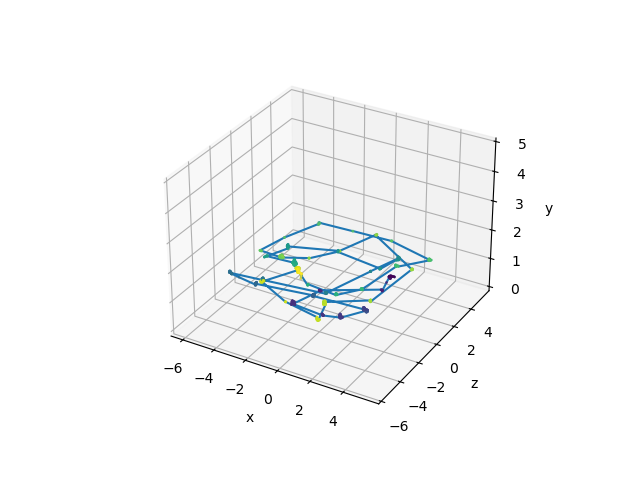

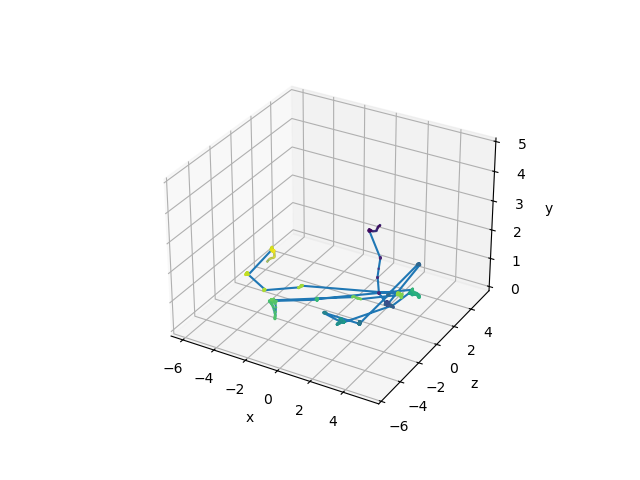

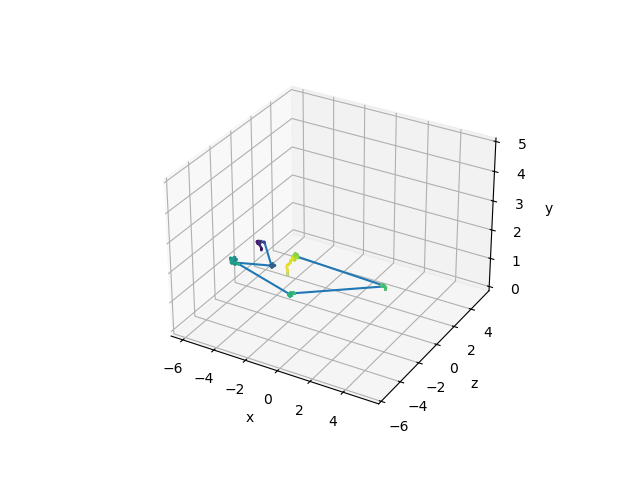

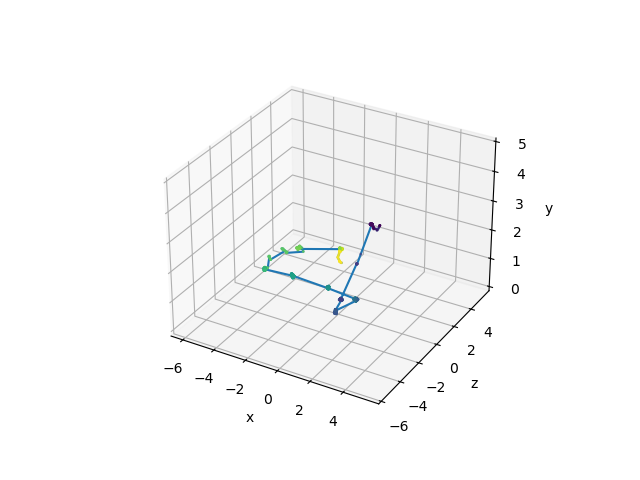

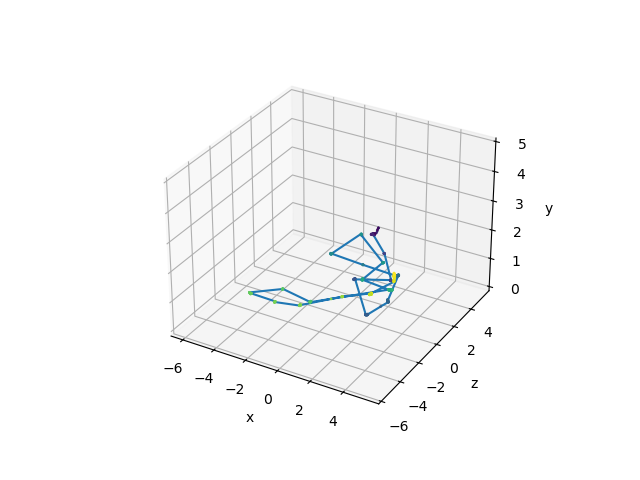

In [5]:
for uId in ids:
    path = paths[uId] #ts[uId],xs[uId],ys[uId],zs[uId]
    #dpath = dpaths[uId]
    tsi.drawPath(path, dpath=None, BBox=bbox)
    #plt.stop()

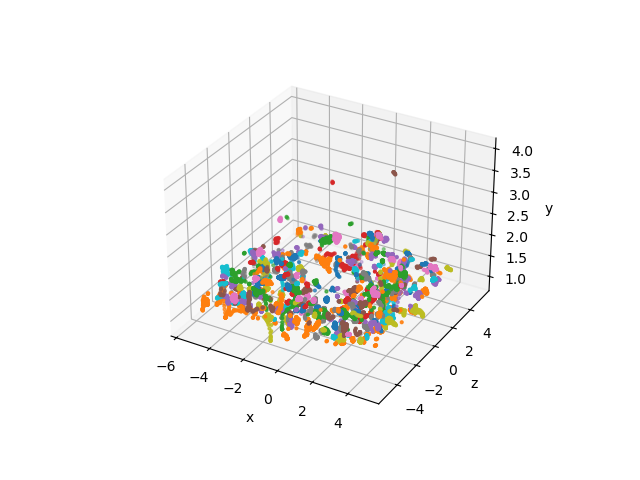

In [10]:
tsi.allPaths3D(paths)

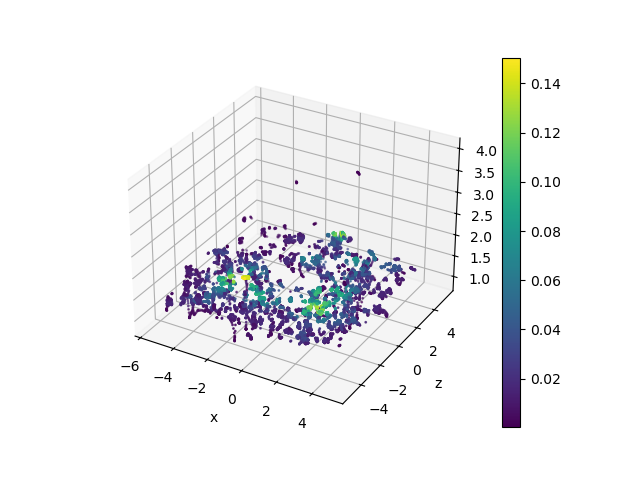

In [14]:
pathsConc =  np.vstack(paths)
tConv,xConc,yConc,zConc = pathsConc.T#np.concatenate(xs),np.concatenate(ys),np.concatenate(zs)

xyz = np.vstack([xConc,yConc,zConc])
kde = stats.gaussian_kde(xyz)
density = kde(xyz)

tsi.plotKDE(xConc,yConc,zConc,density)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


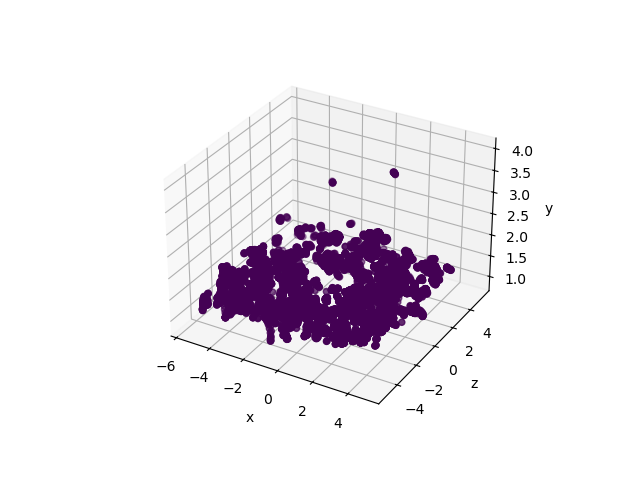

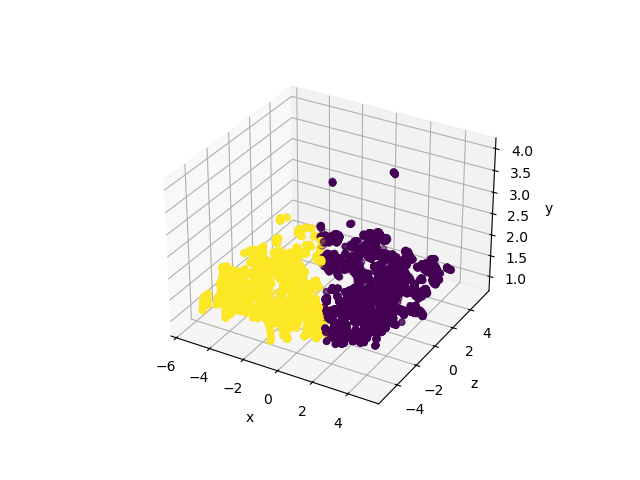

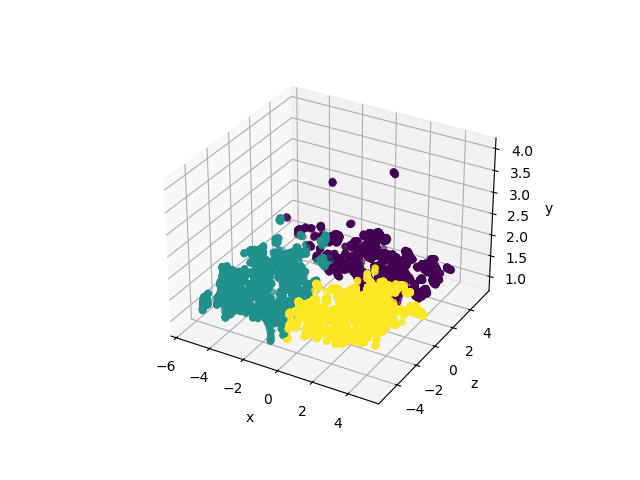

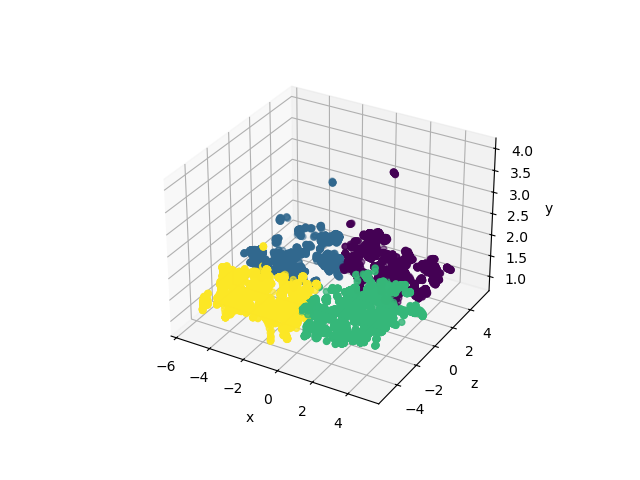

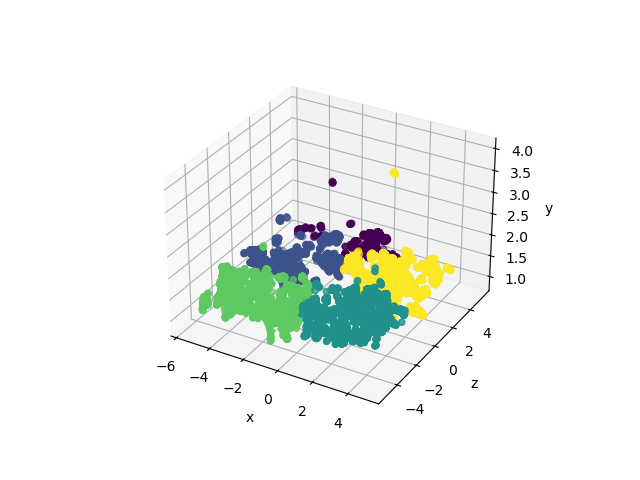

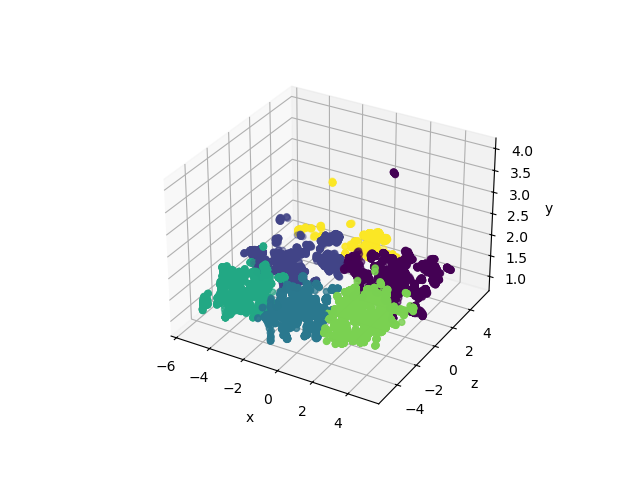

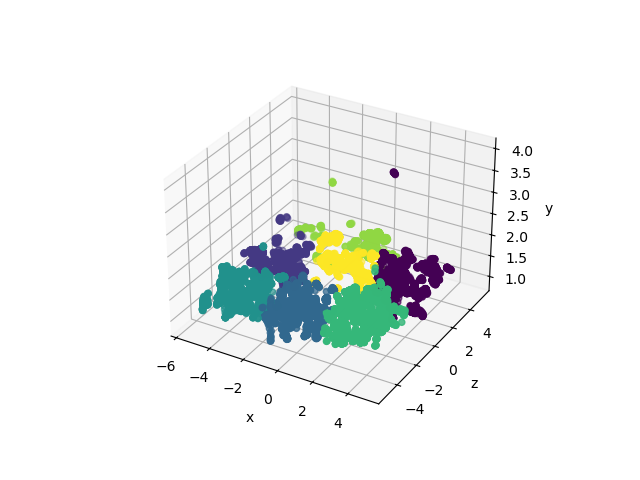

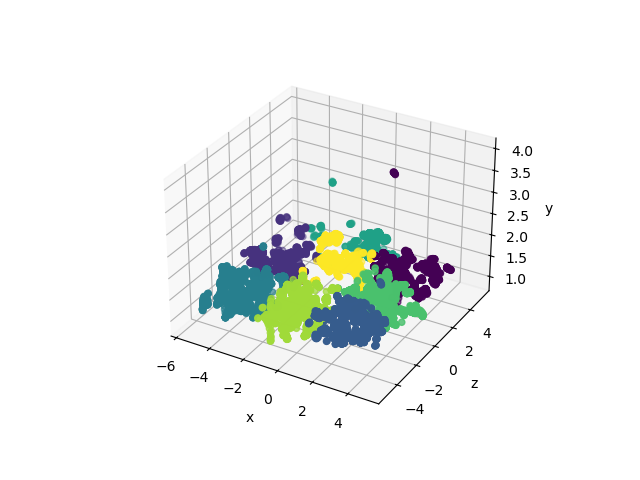

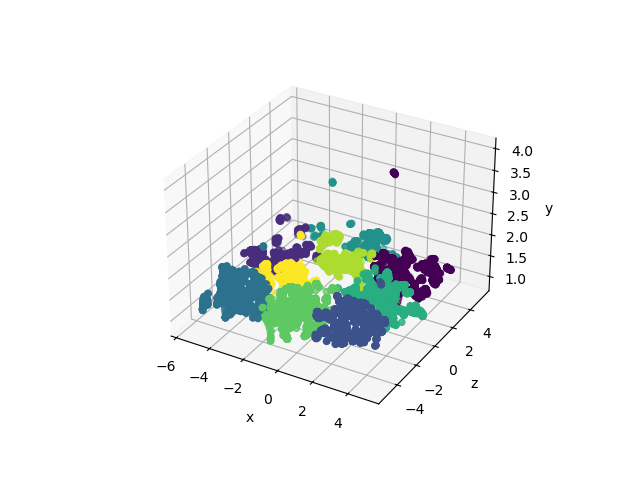

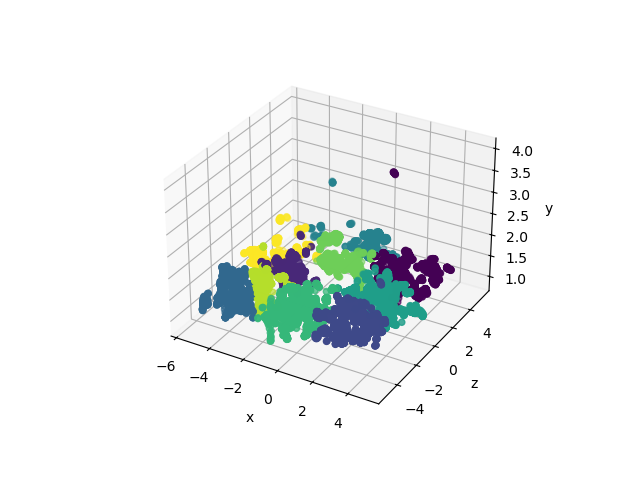

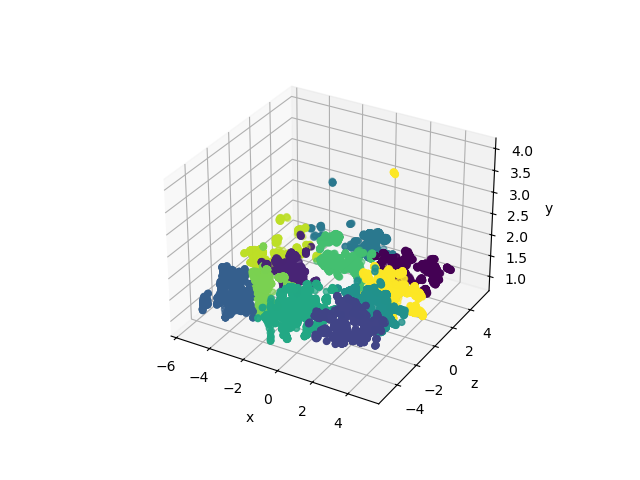

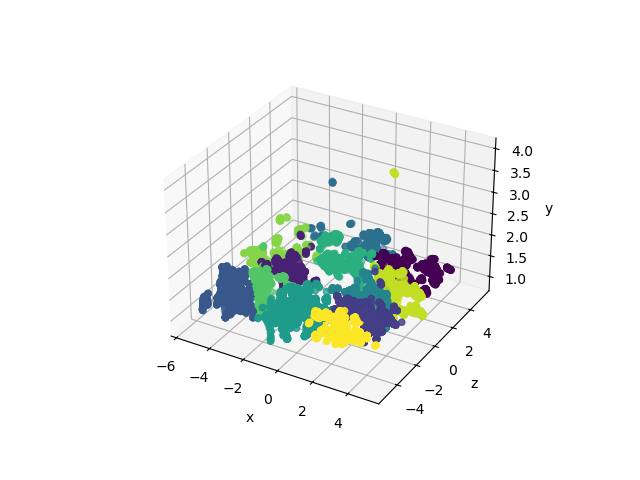

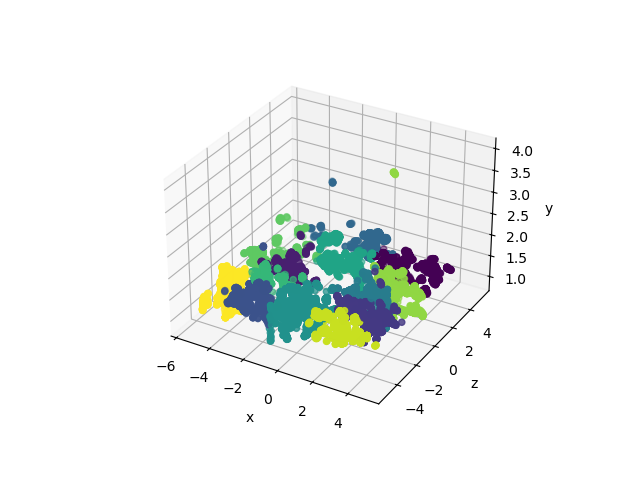

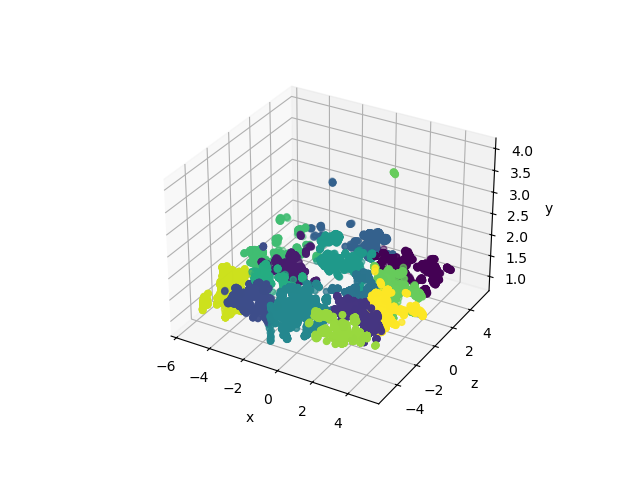

In [48]:
from sklearn.cluster import KMeans

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}



X = xyz.T

sses = []
sses_n_cls = []

silhouette_scores = []
silhouette_scores_n_cls = []

calinski_harabasz_score = []
calinski_harabasz_scores_n_cls = []

davies_bouldin_scores = []
davies_bouldin_scores_n_cls = []

for n_cl in range(1,15):
    
    print(n_cl)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    kmeans = KMeans(n_clusters=n_cl, **common_params)
    labels = kmeans.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 2], X[:, 1], c=labels)
    
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')

    sse = kmeans.inertia_ 
    sses.append(sse)
    sses_n_cls.append(n_cl)

    if n_cl>1:
        sil = metrics.silhouette_score(X, labels, metric='euclidean')
        silhouette_scores.append(sil)
        silhouette_scores_n_cls.append(n_cl)
        ch = metrics.calinski_harabasz_score(X, labels)
        calinski_harabasz_score.append(ch)
        calinski_harabasz_scores_n_cls.append(n_cl)
        db = metrics.davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(db)
        davies_bouldin_scores_n_cls.append(n_cl)

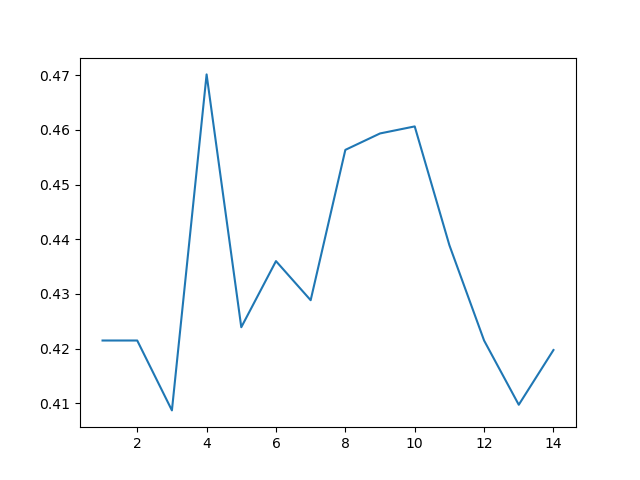

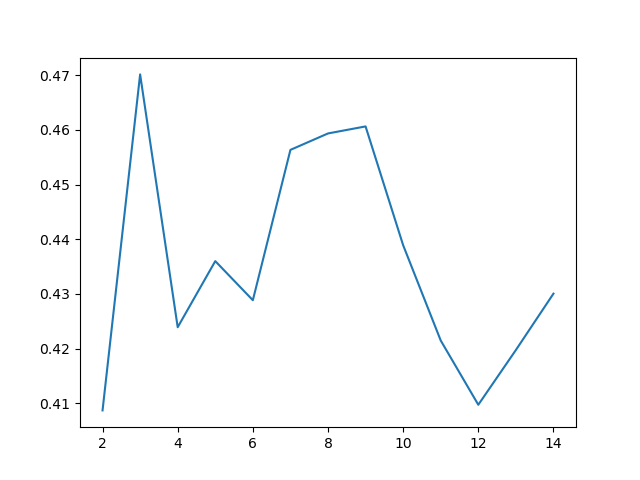

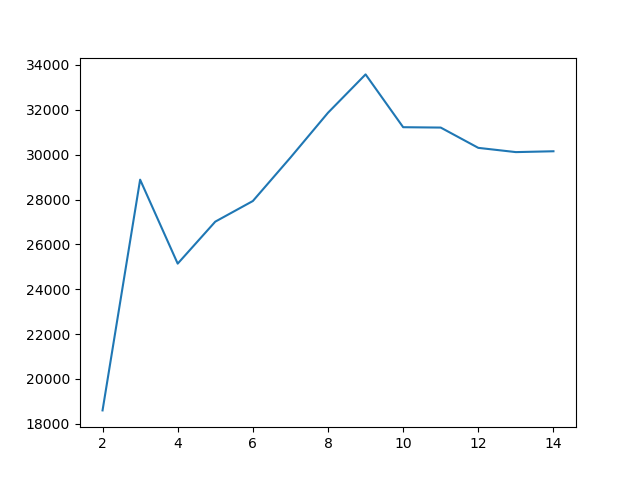

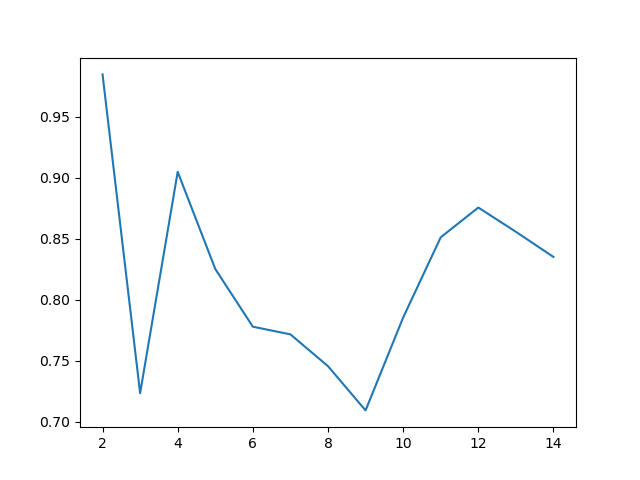

In [47]:
plt.figure()
plt.plot(sses_n_cls,sses)
plt.figure()
plt.plot(silhouette_scores_n_cls,silhouette_scores)
plt.figure()
plt.plot(calinski_harabasz_scores_n_cls,calinski_harabasz_score)
plt.figure()
plt.plot(davies_bouldin_scores_n_cls,davies_bouldin_scores)